In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import and create DF for first file - list of IP addresses from Amplitude that had no carrier information
#I was able to get carrier information for each IP address by using WHOIS lookup on MS Copilot

# Importing Data

In [4]:
ph_missing_carriers = pd.read_excel('PH Mobile Carriers.xlsx')

In [5]:
#Inspect the DF

In [6]:
ph_missing_carriers.head()

,ip_address,carrier
0,136.158.60.147,Converge ICT
1,160.187.221.150,Unknown
2,119.93.218.118,PLDT
3,158.62.36.167,Globe Telecom
4,103.247.228.60,HGC Global Communications


In [7]:
#Import and create second DF, Amplitude User data

In [8]:
use_cols = ['ip_address', 'carrier', 'country']
ph_amp = pd.read_csv('PH Amp.csv', usecols=use_cols)

In [9]:
ph_amp.head()

,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,--,Philippines,136.158.60.147
2,--,Malaysia,161.142.150.187
3,TM,Philippines,180.191.19.93
4,NaN,Philippines,160.187.221.150


In [10]:
#Next, I need to clean the Amplitude data
#I want to keep only those users that are based in Philippines first

# Cleaning Data

In [11]:
ph_amp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312579 entries, 0 to 312578
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   carrier     251183 non-null  object
 1   country     312278 non-null  object
 2   ip_address  312278 non-null  object
dtypes: object(3)
memory usage: 7.2+ MB


In [12]:
#next let's clean the country column to only have Philippines

In [13]:
ph_amp_cleaned = ph_amp[ph_amp['country'] == 'Philippines']
ph_amp_cleaned.head(20)

,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,--,Philippines,136.158.60.147
3,TM,Philippines,180.191.19.93
4,NaN,Philippines,160.187.221.150
5,TNT,Philippines,175.176.68.194
6,NaN,Philippines,119.93.218.118
7,SMART,Philippines,175.176.48.65
8,DITO,Philippines,175.176.41.88
9,--,Philippines,158.62.36.167
10,TM,Philippines,112.202.61.245


In [14]:
#even though we've filtered out the dataframe, let's override it to be safe. 

In [15]:
ph_amp = ph_amp_cleaned
ph_amp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298971 entries, 0 to 312578
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   carrier     239875 non-null  object
 1   country     298971 non-null  object
 2   ip_address  298971 non-null  object
dtypes: object(3)
memory usage: 9.1+ MB


In [16]:
#i just prefer overriding rather than filtering my data so I can use the shortened DF names

In [17]:
ph_amp.head(20)

,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,--,Philippines,136.158.60.147
3,TM,Philippines,180.191.19.93
4,NaN,Philippines,160.187.221.150
5,TNT,Philippines,175.176.68.194
6,NaN,Philippines,119.93.218.118
7,SMART,Philippines,175.176.48.65
8,DITO,Philippines,175.176.41.88
9,--,Philippines,158.62.36.167
10,TM,Philippines,112.202.61.245


In [18]:
#let's find the missing values in the carrier column

In [19]:
missing_mask = (ph_amp['carrier'].isna()) | (ph_amp['carrier'] == '') | (ph_amp['carrier'] == '--')
missing_carrier_df = ph_amp[missing_mask]
missing_carrier_df.head(20)


,carrier,country,ip_address
1,--,Philippines,136.158.60.147
4,NaN,Philippines,160.187.221.150
6,NaN,Philippines,119.93.218.118
9,--,Philippines,158.62.36.167
11,--,Philippines,103.247.228.60
12,--,Philippines,175.176.34.248
13,--,Philippines,175.176.16.201
15,--,Philippines,112.200.13.164
17,NaN,Philippines,180.191.71.143
20,--,Philippines,112.207.18.87


In [20]:
ph_amp.isna().sum()

carrier       59096
country           0
ip_address        0
dtype: int64

In [21]:
ph_amp[ph_amp == '--'].count()

carrier       70353
country           0
ip_address        0
dtype: int64

In [22]:
#now we need to merge the two dataframes together so we can replace the missing values

In [23]:
ph_amp['ip_address'] = ph_amp['ip_address'].astype(str).str.strip()
ph_missing_carriers['ip_address'] = ph_missing_carriers['ip_address'].astype(str).str.strip()
#clean the ip address columns as the unique key to merge

In [24]:
ph_amp_merged = ph_amp.merge(ph_missing_carriers[['ip_address', 'carrier']], on='ip_address', how='left', suffixes=('', '_from_ip'))

In [25]:
ph_amp_merged.head(20)

,carrier,country,ip_address,carrier_from_ip
0,SMART,Philippines,124.217.57.90,NaN
1,--,Philippines,136.158.60.147,Converge ICT
2,TM,Philippines,180.191.19.93,NaN
3,NaN,Philippines,160.187.221.150,Unknown
4,NaN,Philippines,160.187.221.150,Unknown
5,NaN,Philippines,160.187.221.150,Unknown
6,NaN,Philippines,160.187.221.150,Unknown
7,TNT,Philippines,175.176.68.194,NaN
8,NaN,Philippines,119.93.218.118,PLDT
9,SMART,Philippines,175.176.48.65,NaN


In [26]:
mask = ph_amp_merged['carrier'].isna() | ph_amp_merged['carrier'].isin(['', '--'])
ph_amp_merged['carrier'] = np.where(
    mask & ph_amp_merged['carrier_from_ip'].notna(),
    ph_amp_merged['carrier_from_ip'],
    ph_amp_merged['carrier']
)

In [27]:
mask.head(20)

0     False
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16     True
17     True
18    False
19     True
Name: carrier, dtype: bool

In [28]:
ph_amp_merged.drop(columns=['carrier_from_ip'], inplace=True)

In [29]:
ph_amp_merged.head(20)

,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,Converge ICT,Philippines,136.158.60.147
2,TM,Philippines,180.191.19.93
3,Unknown,Philippines,160.187.221.150
4,Unknown,Philippines,160.187.221.150
5,Unknown,Philippines,160.187.221.150
6,Unknown,Philippines,160.187.221.150
7,TNT,Philippines,175.176.68.194
8,PLDT,Philippines,119.93.218.118
9,SMART,Philippines,175.176.48.65


In [30]:
#looks like we were able to fill in the missing carrier information, let's double check

In [31]:
ph_amp_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443860 entries, 0 to 443859
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   carrier     443860 non-null  object
 1   country     443860 non-null  object
 2   ip_address  443860 non-null  object
dtypes: object(3)
memory usage: 13.5+ MB


In [32]:
#all the records on each column match, so we can assume the missing values have been replaced

In [40]:
ph_amp = ph_amp_merged

In [41]:
carrier_counts = ph_amp['carrier'].value_counts()
carriers_5k_up = carrier_counts[carrier_counts >= 5000].index
ph_amp_filtered = ph_amp[ph_amp['carrier'].isin(carriers_5k_up)]

In [45]:
ph_amp_filtered['carrier'].value_counts()

Unknown                 98275
GLOBE                   55083
Smart Communications    51240
SMART                   46252
TNT                     41569
Converge ICT            41222
DITO                    24176
TM                      24057
Globe Telecom           17225
InfiniVAN               11956
DITO Telecommunity       6854
Name: carrier, dtype: int64

In [34]:
#looks like we need to be ok with unknown mobile carriers, which is ok...but not ideal, its quite a lot so lets remove them

In [46]:
ph_amp_final = ph_amp_filtered
ph_amp_final.head(20)

,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,Converge ICT,Philippines,136.158.60.147
2,TM,Philippines,180.191.19.93
3,Unknown,Philippines,160.187.221.150
4,Unknown,Philippines,160.187.221.150
5,Unknown,Philippines,160.187.221.150
6,Unknown,Philippines,160.187.221.150
7,TNT,Philippines,175.176.68.194
9,SMART,Philippines,175.176.48.65
10,DITO,Philippines,175.176.41.88


# Exploraty Analaysis

In [37]:
#we don't need an indepth EDA but just to summarize the distribution of carrier coverage in the market

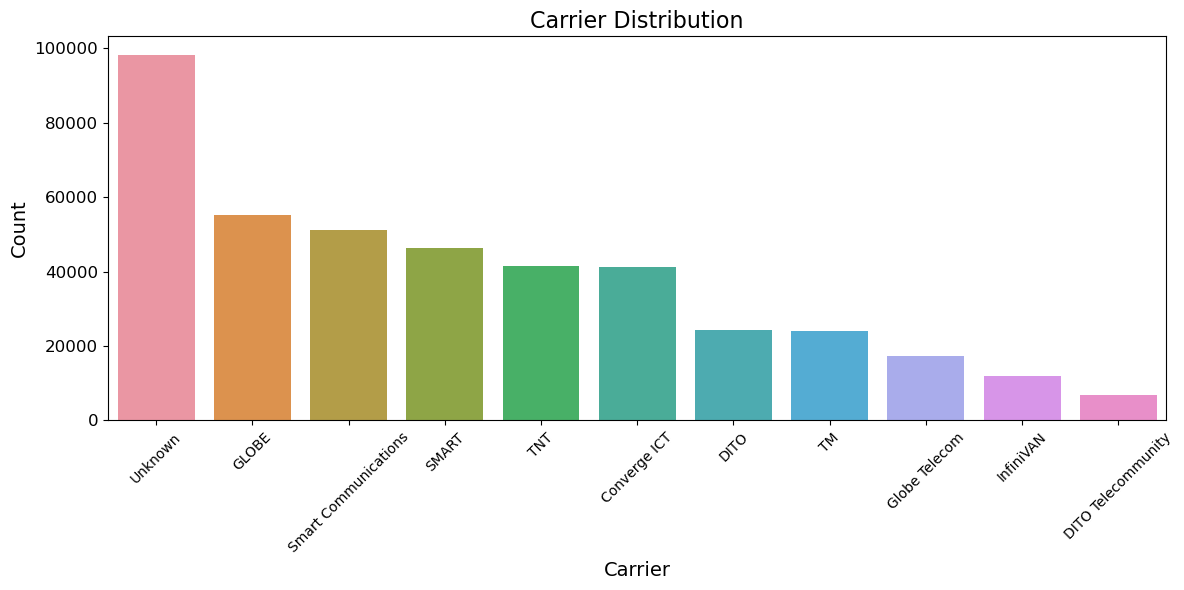

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='carrier', data=ph_amp_final, order=ph_amp_final['carrier'].value_counts().index)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Carrier Distribution', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#we weren't able to get the unknown carriers from the IP address of those users, which accounts for about 25% of total records
# probably we can remove them for our statistical test, but may reduce our confidence interval

In [ ]:
#let's take a closer look at specifically Globe and Smart and sum all of the different carriers under those brands
#note, TNT is owned by Smart but let's keep it separate

In [51]:
ph_amp_final_filter = ph_amp_final[ph_amp_final['carrier'].str.contains('Smart') | ph_amp_final['carrier'].str.contains('Globe')]
ph_amp_final_filter.head(20)

,carrier,country,ip_address
12,Globe,Philippines,158.62.36.167
16,Smart Communications,Philippines,175.176.34.248
17,Smart Communications,Philippines,175.176.16.201
19,Smart Communications,Philippines,112.200.13.164
20,Smart Communications,Philippines,112.200.13.164
23,Globe,Philippines,180.191.71.143
26,Smart Communications,Philippines,112.207.18.87
32,Smart Communications,Philippines,49.144.194.69
40,Globe,Philippines,180.195.65.200
43,Smart Communications,Philippines,112.198.97.93


In [52]:
ph_amp_final_filter.replace(to_replace='Smart Communications', value='Smart')
ph_amp_final_filter = ph_amp_final_filter.replace(to_replace='Smart Communications', value='Smart') 
ph_amp_final_filter

,carrier,country,ip_address
12,Globe,Philippines,158.62.36.167
16,Smart,Philippines,175.176.34.248
17,Smart,Philippines,175.176.16.201
19,Smart,Philippines,112.200.13.164
20,Smart,Philippines,112.200.13.164
...,...,...,...
443804,Globe,Philippines,221.121.99.125
443818,Smart,Philippines,49.144.43.217
443828,Smart,Philippines,112.207.0.207
443846,Globe,Philippines,209.35.174.248


In [53]:
ph_amp_final_filter.replace(to_replace='Globe Telecom', value='Globe')
ph_amp_final_filter = ph_amp_final_filter.replace(to_replace='Globe Telecom', value='Globe')
ph_amp_final_filter

,carrier,country,ip_address
12,Globe,Philippines,158.62.36.167
16,Smart,Philippines,175.176.34.248
17,Smart,Philippines,175.176.16.201
19,Smart,Philippines,112.200.13.164
20,Smart,Philippines,112.200.13.164
...,...,...,...
443804,Globe,Philippines,221.121.99.125
443818,Smart,Philippines,49.144.43.217
443828,Smart,Philippines,112.207.0.207
443846,Globe,Philippines,209.35.174.248


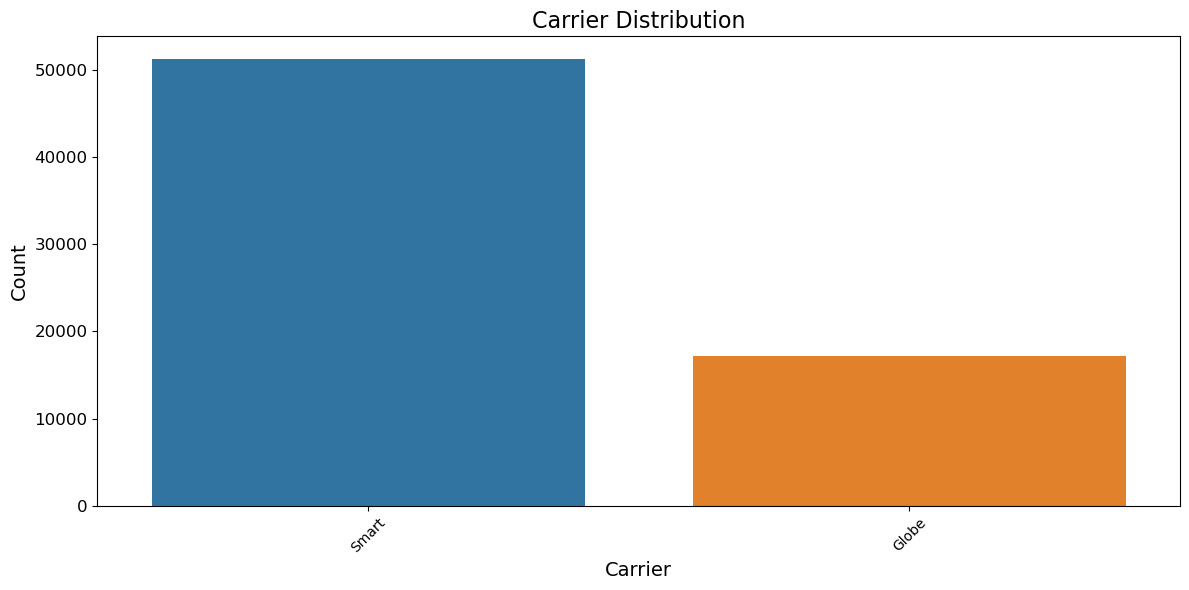

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='carrier', data=ph_amp_final_filter, order=ph_amp_final_filter['carrier'].value_counts().index)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Carrier Distribution', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#when combined we can see how many more NBA App users are coming from Smart Mobile Carrier vs Globe Carrier

In [ ]:
#before we take a sample let's remove the Unknown mobile carriers since it will add some bias

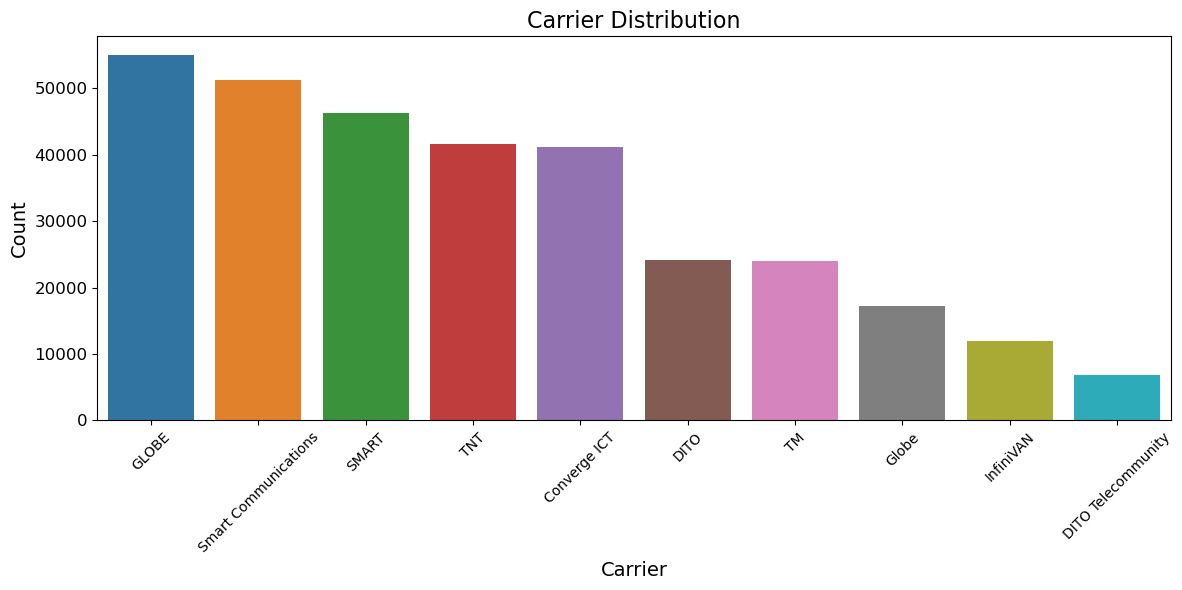

In [55]:
ph_amp_final = ph_amp_final[ph_amp_final['carrier'] != 'Unknown']
plt.figure(figsize=(12, 6))
sns.countplot(x='carrier', data=ph_amp_final, order=ph_amp_final['carrier'].value_counts().index)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Carrier Distribution', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#ok forgot we need to combine Smart and Globe

In [60]:
ph_amp_final['carrier'] = ph_amp_final['carrier'].replace({
    'Smart Communications': 'SMART'})
ph_amp_final


C:\Users\rgarner\AppData\Local\Temp\ipykernel_23012\1999145631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_amp_final['carrier'] = ph_amp_final['carrier'].replace({


,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,Converge ICT,Philippines,136.158.60.147
2,TM,Philippines,180.191.19.93
7,TNT,Philippines,175.176.68.194
9,SMART,Philippines,175.176.48.65
...,...,...,...
443851,DITO Telecommunity,Philippines,161.49.149.178
443852,Converge ICT,Philippines,136.158.11.16
443853,Converge ICT,Philippines,136.158.11.16
443854,TM,Philippines,110.54.137.36


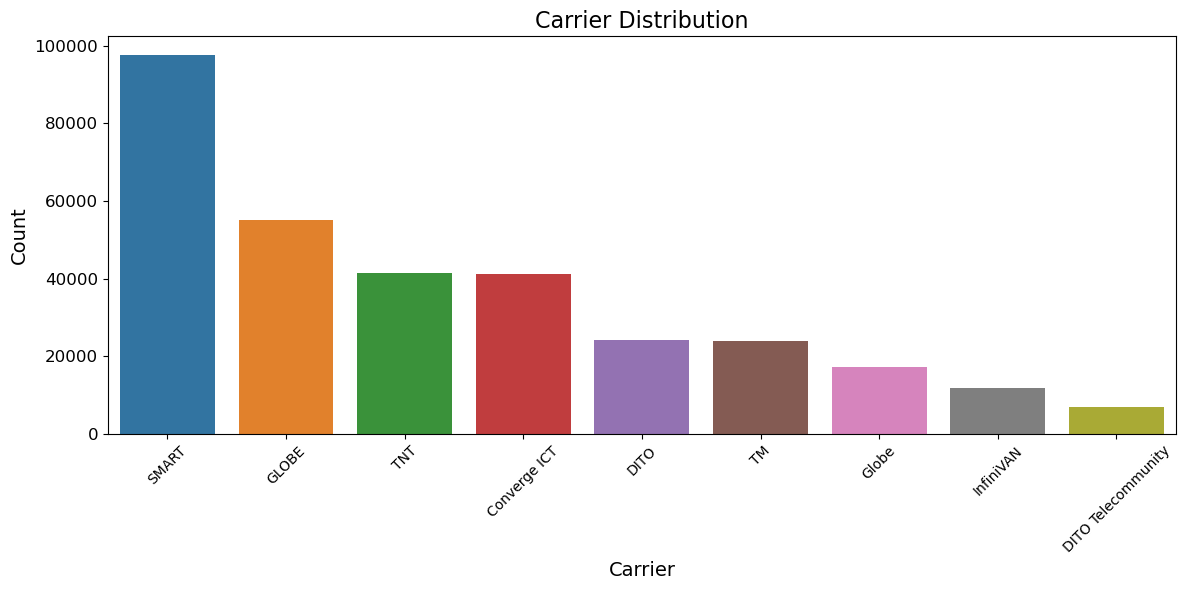

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x='carrier', data=ph_amp_final, order=ph_amp_final['carrier'].value_counts().index)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Carrier Distribution', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [62]:
ph_amp_final['carrier'] = ph_amp_final['carrier'].replace({
    'Globe': 'GLOBE'})
ph_amp_final


C:\Users\rgarner\AppData\Local\Temp\ipykernel_23012\553695817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_amp_final['carrier'] = ph_amp_final['carrier'].replace({


,carrier,country,ip_address
0,SMART,Philippines,124.217.57.90
1,Converge ICT,Philippines,136.158.60.147
2,TM,Philippines,180.191.19.93
7,TNT,Philippines,175.176.68.194
9,SMART,Philippines,175.176.48.65
...,...,...,...
443851,DITO Telecommunity,Philippines,161.49.149.178
443852,Converge ICT,Philippines,136.158.11.16
443853,Converge ICT,Philippines,136.158.11.16
443854,TM,Philippines,110.54.137.36


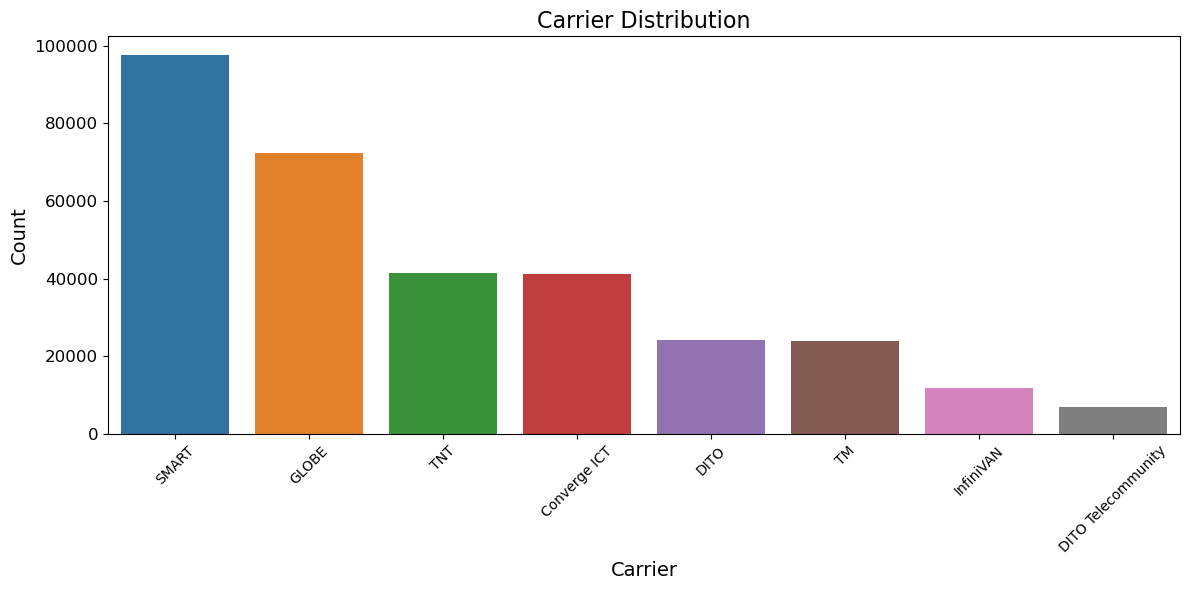

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='carrier', data=ph_amp_final, order=ph_amp_final['carrier'].value_counts().index)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Carrier Distribution', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#now we have Smart and Globe combined and reduced the number of carrier categories

# Sampling

In [64]:
#lets take a 10000 random sample
ph_amp_final_sample = ph_amp_final.sample(n=10000, random_state=42)

In [65]:
#lets calculate the sample proportion for Smart, TNT and together
smart_tnt_count = ph_amp_final_sample[ph_amp_final_sample['carrier'].isin(['SMART', 'TNT'])].shape[0]
sample_size = ph_amp_final_sample.shape[0]
sample_proportion_smart_tnt = smart_tnt_count / sample_size
print(sample_proportion_smart_tnt)


0.4387


In [66]:
smart_count = ph_amp_final_sample[ph_amp_final_sample['carrier'].isin(['SMART'])].shape[0]
sample_size = ph_amp_final_sample.shape[0]
sample_proportion_smart = smart_count / sample_size
print(sample_proportion_smart)

0.3109


In [67]:
tnt_count = ph_amp_final_sample[ph_amp_final_sample['carrier'].isin(['TNT'])].shape[0]
sample_size = ph_amp_final_sample.shape[0]
sample_proportion_tnt = tnt_count / sample_size
print(sample_proportion_tnt)

0.1278


In [68]:
#so 43.87% of users in the sample belong to either Smart or TNT
#31% of users in the sample belong to Smart
#12.78% of users in the sample belong to TNT

In [71]:
#let's create a dataframe to store these sample proportions
sample_proportions = {
    'Sample': ['Smart_TNT', 'Smart', 'TNT'],
    'Proportion': ['0.4387', '0.3109', '0.1278']
}

#create DF from dictionary

sample_proportion_df = pd.DataFrame(sample_proportions)

#print the dataframe
print(sample_proportion_df)

      Sample Proportion
0  Smart_TNT     0.4387
1      Smart     0.3109
2        TNT     0.1278


In [84]:
sample_proportion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sample      3 non-null      object
 1   Proportion  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [85]:
sample_proportion_df['Proportion'] = pd.to_numeric(sample_proportion_df['Proportion'], errors='coerce')

In [86]:
sample_proportion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample      3 non-null      object 
 1   Proportion  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


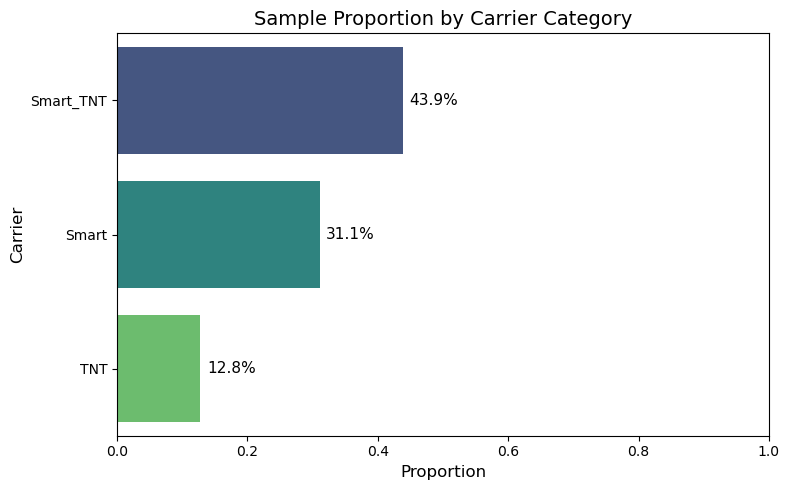

In [92]:

plt.figure(figsize=(8, 5))
ax = sns.barplot(y='Sample', x='Proportion', data=sample_proportion_df, palette='viridis')

# Add percentage labels
for i, row in sample_proportion_df.iterrows():
    ax.text(row['Proportion'] + 0.01, i, f"{row['Proportion']:.1%}", va='center', fontsize=11)



plt.title('Sample Proportion by Carrier Category', fontsize=14)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Carrier', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [69]:
#lets take the population proportions as well for use in our hypothesis test

In [94]:
smart_tnt_count_pop = ph_amp_final[ph_amp_final['carrier'].isin(['SMART', 'TNT'])].shape[0]
smart_count_pop = ph_amp_final[ph_amp_final['carrier'].isin(['SMART'])].shape[0]
tnt_count_pop = ph_amp_final[ph_amp_final['carrier'].isin(['TNT'])].shape[0]

#total population size

population_size = ph_amp_final.shape[0]

#now calculate the proportions

smart_tnt_count_pop_prop = smart_tnt_count_pop / population_size
smart_count_pop_prop = smart_count_pop / population_size
tnt_count_pop_prop = tnt_count_pop / population_size

print(smart_tnt_count_pop_prop)
print(smart_count_pop_prop)
print(tnt_count_pop_prop)

0.43506322856767426
0.30501135673927054
0.13005187182840375


In [96]:
print(round(smart_tnt_count_pop_prop, 4))
print(round(smart_count_pop_prop, 4))
print(round(tnt_count_pop_prop, 4))

0.4351
0.305
0.1301


In [97]:
#now lets create a dataframe to store these values

population_proportions = {
    'Sample': ['Smart_TNT', 'Smart', 'TNT'],
    'Proportion': ['0.4351', '0.305', '0.1301']
}

#create DF from dictionary

population_proportion_df = pd.DataFrame(population_proportions)

#print the dataframe
print(population_proportion_df)

      Sample Proportion
0  Smart_TNT     0.4351
1      Smart      0.305
2        TNT     0.1301


In [102]:
population_proportion_df['Proportion'] = pd.to_numeric(sample_proportion_df['Proportion'], errors='coerce')

In [103]:
population_proportion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample      3 non-null      object 
 1   Proportion  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


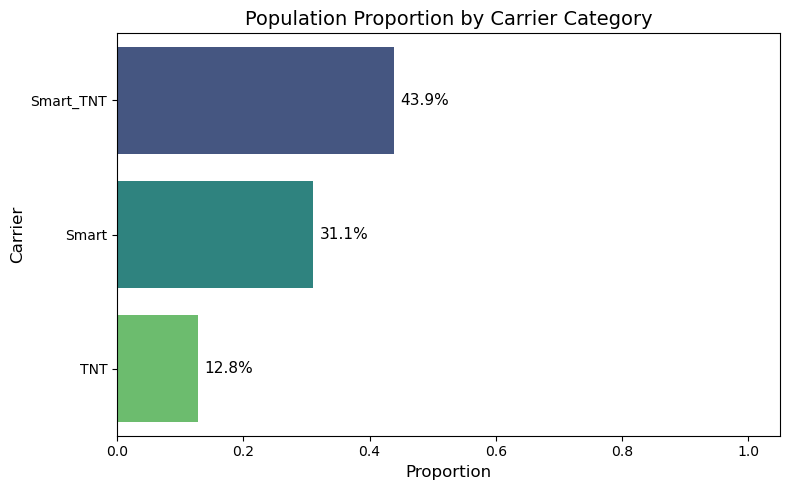

In [104]:
plt.figure(figsize=(8, 5))
bx = sns.barplot(y='Sample', x='Proportion', data=population_proportion_df, palette='viridis')

# Add percentage labels
for i, row in population_proportion_df.iterrows():
    bx.text(row['Proportion'] + 0.01, i, f"{row['Proportion']:.1%}", va='center', fontsize=11)

plt.title('Population Proportion by Carrier Category', fontsize=14)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Carrier', fontsize=12)
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


In [105]:
#lets combine the sample and population proportions into one barplot to compare more easily

In [106]:
#first combine the dataframes

# Add a label to each DataFrame
sample_proportion_df['Source'] = 'Sample'
population_proportion_df['Source'] = 'Population'

# Combine the two
combined_df = pd.concat([sample_proportion_df, population_proportion_df], ignore_index=True)

combined_df

,Sample,Proportion,Source
0,Smart_TNT,0.4387,Sample
1,Smart,0.3109,Sample
2,TNT,0.1278,Sample
3,Smart_TNT,0.4387,Population
4,Smart,0.3109,Population
5,TNT,0.1278,Population


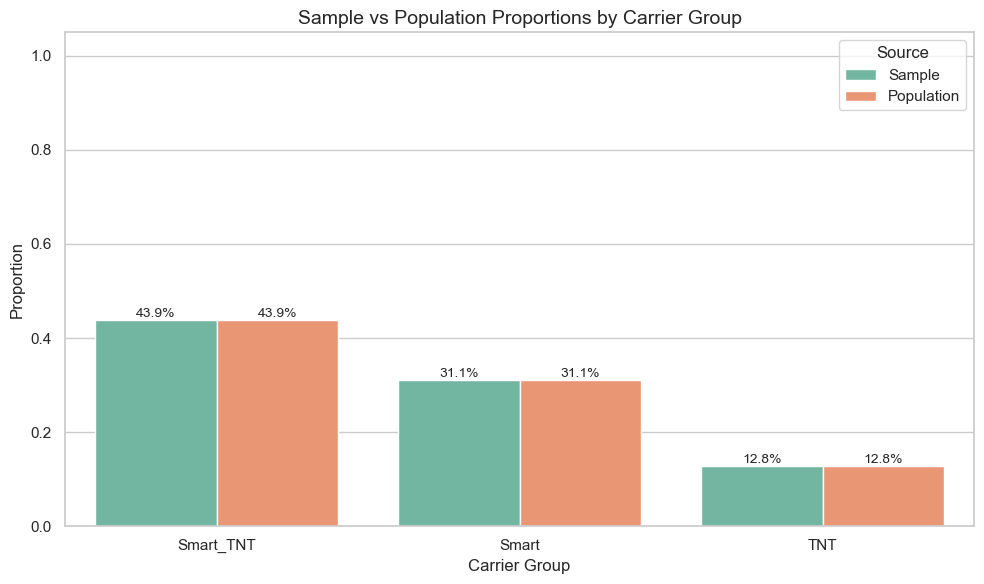

In [108]:
#plot with seaborn

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

bx = sns.barplot(
    data=combined_df,
    x='Sample',
    y='Proportion',
    hue='Source',
    palette='Set2'
)

plt.title('Sample vs Population Proportions by Carrier Group', fontsize=14)
plt.xlabel('Carrier Group', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.ylim(0, 1.05)

# Add percentage labels on top of bars
for container in bx.containers:
    bx.bar_label(container, labels=[f"{v.get_height():.1%}" for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()



In [109]:
#the population and sample proportions look identical but lets run our statistical test to make sure

# Statistical Z-test

In [110]:
#our test is to determine if the proportion of mobile carrier users in the sample is different from the population

In [113]:
#lets start the test of Smart_TNT users combined

n_sample = 10000 #sample size
x_sample= smart_tnt_count #number of smart_tnt users in the sample

n_pop = population_size #population size
x_pop = smart_tnt_count_pop #number of smart_tnt users in the population

from statsmodels.stats.proportion import proportions_ztest

#combine the data

counts = [x_sample, x_pop]
nobs = [n_sample, n_pop]

#two-tailed test

stat, pval = proportions_ztest(count=counts, nobs=nobs)

print(f"Z-statistics: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-statistics: 0.7223
P-value: 0.4701


In [114]:
#P-value is >= 0.05 so there's no significant difference between the sample proportion and population proportion for the Smart-TNT users

In [117]:
#Now lets do Smart users separately

n_sample_smart = 10000 #sample size
x_sample_smart = smart_count #number of smart users in the sample

n_pop_smart = population_size #population size
x_pop_smart = smart_count_pop #number of smart_tnt users in the population

from statsmodels.stats.proportion import proportions_ztest

#combine the data

counts = [x_sample, x_pop]
nobs = [n_sample, n_pop]

#two-tailed test

stat, pval = proportions_ztest(count=counts, nobs=nobs)

print(f"Z-statistics: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-statistics: 0.7223
P-value: 0.4701


In [118]:
#P-value is >= 0.05 so there's no significant difference between the sample proportion and population proportion for the Smart-TNT users

In [120]:
#only TNT users

n_sample_tnt = 10000 #sample size
x_sample_tnt = tnt_count #number of smart users in the sample

n_pop_tnt = population_size #population size
x_pop_tnt = tnt_count_pop #number of smart_tnt users in the population

from statsmodels.stats.proportion import proportions_ztest

#combine the data

counts = [x_sample, x_pop]
nobs = [n_sample, n_pop]

#two-tailed test

stat, pval = proportions_ztest(count=counts, nobs=nobs)

print(f"Z-statistics: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-statistics: 0.7223
P-value: 0.4701


In [121]:
#P-value is >= 0.05 so there's no significant difference between the sample proportion and population proportion for the Smart-TNT users

In [123]:
#let's calculate our confidence intervals next

In [124]:
from statsmodels.stats.proportion import proportion_confint

# Smart_TNT combined
smart_tnt_ci_low, smart_tnt_ci_high = proportion_confint(
    count=smart_tnt_count,
    nobs=n_sample,
    alpha=0.05,
    method='normal'
)


# Smart
smart_ci_low, smart_ci_high = proportion_confint(
    count=smart_count,
    nobs=n_sample,
    alpha=0.05,
    method='normal'  # 'wilson' is more accurate for small samples, but 'normal' is fine for 10k+
)

# TNT
tnt_ci_low, tnt_ci_high = proportion_confint(
    count=tnt_count,
    nobs=n_sample,
    alpha=0.05,
    method='normal'
)



In [125]:
ci_df = pd.DataFrame({
    'Carrier': ['Smart_TNT', 'Smart', 'TNT'],
    'Sample Proportion': [sample_proportion_smart_tnt, sample_proportion_smart, sample_proportion_tnt],
    'CI Low': [smart_tnt_ci_low, smart_ci_low, tnt_ci_low],
    'CI High': [smart_tnt_ci_high, smart_ci_high, tnt_ci_high]
})

ci_df

,Carrier,Sample Proportion,CI Low,CI High
0,Smart_TNT,0.4387,0.428974,0.448426
1,Smart,0.3109,0.301828,0.319972
2,TNT,0.1278,0.121256,0.134344


# Results Interpretation

In [126]:
#we are 95% confident that the true population proportion of Smart_TNT users combined is between 42.9% and 44.84%
#we are 95% confident that the true population proportion of Smart users is between 30.18% and 31.99%
##we are 95% confident that the true population proportion of TNT users is between 12.13% and 13.43%

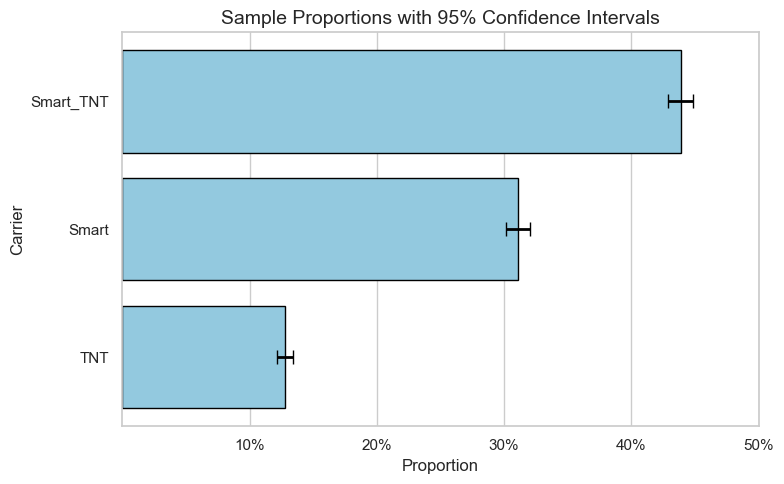

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Plot the bar chart
sns.barplot(
    x='Sample Proportion',
    y='Carrier',
    data=ci_df,
    color='skyblue',
    edgecolor='black'
)

# Add error bars for confidence intervals
for i, row in ci_df.iterrows():
    ci_range = row['CI High'] - row['CI Low']
    plt.errorbar(
        x=row['Sample Proportion'],
        y=i,
        xerr=ci_range / 2,
        fmt='none',
        ecolor='black',
        capsize=5,
        linewidth=2
    )

# Format
plt.title('Sample Proportions with 95% Confidence Intervals', fontsize=14)
plt.xlabel('Proportion')
plt.ylabel('Carrier')
plt.xlim(0, 0.5)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5], [f'{x:.0%}' for x in [0.1, 0.2, 0.3, 0.4, 0.5]])
plt.tight_layout()
plt.show()


In [131]:
#now lets update our dataframe with population proportions

population_proportions_final = pd.DataFrame({
    'Carrier': ['Smart_TNT', 'Smart', 'TNT'],
    'Population Proportion': ['0.4351', '0.305', '0.1301']
})

#then merge with the CI dataframe

merged_df = merged_df = ci_df.merge(population_proportions_final, on='Carrier', how='inner')


merged_df

,Carrier,Sample Proportion,CI Low,CI High,Population Proportion
0,Smart_TNT,0.4387,0.428974,0.448426,0.4351
1,Smart,0.3109,0.301828,0.319972,0.305
2,TNT,0.1278,0.121256,0.134344,0.1301


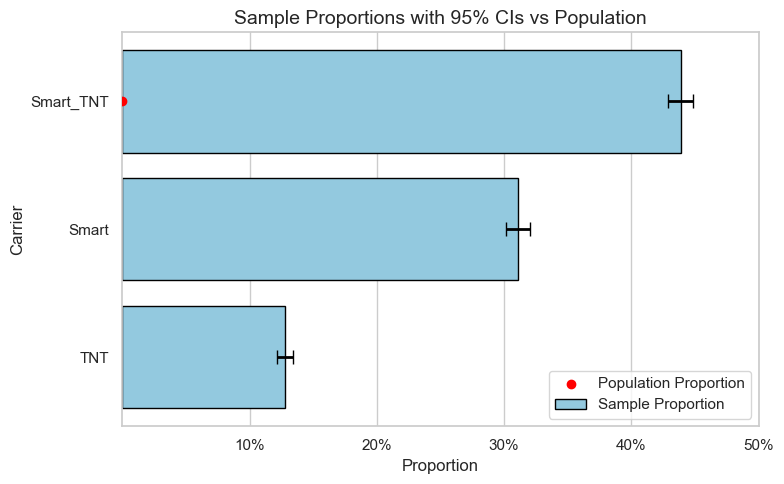

In [132]:
#fianlly lets visualize the combined dataframe

plt.figure(figsize=(8, 5))

# Plot the sample proportion bars
sns.barplot(
    x='Sample Proportion',
    y='Carrier',
    data=merged_df,
    color='skyblue',
    edgecolor='black',
    label='Sample Proportion'
)

# Add error bars for 95% CIs
for i, row in merged_df.iterrows():
    ci_range = row['CI High'] - row['CI Low']
    plt.errorbar(
        x=row['Sample Proportion'],
        y=i,
        xerr=ci_range / 2,
        fmt='none',
        ecolor='black',
        capsize=5,
        linewidth=2
    )

# Overlay population proportions as red markers
plt.scatter(
    x=merged_df['Population Proportion'],
    y=range(len(merged_df)),
    color='red',
    zorder=5,
    label='Population Proportion'
)

# Format
plt.title('Sample Proportions with 95% CIs vs Population', fontsize=14)
plt.xlabel('Proportion')
plt.ylabel('Carrier')
plt.xlim(0, 0.5)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5], [f'{x:.0%}' for x in [0.1, 0.2, 0.3, 0.4, 0.5]])
plt.legend()
plt.tight_layout()
plt.show()
